# Анализа на звучен сигнал од флејта


283584


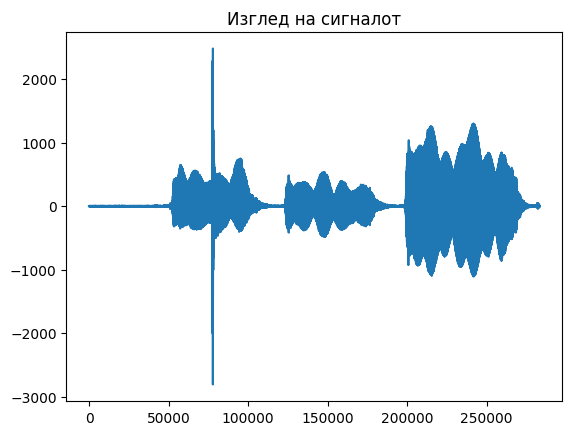

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft
from scipy.io import wavfile
from scipy.signal import find_peaks

samplerate, sig = wavfile.read('Flejta.wav')  # со ова се чита звук снимен во WAV облик 
data = sig[:, 0]
print(len(data))
plt.figure()
plt.plot(data)
plt.title('Изглед на сигналот')
plt.show()


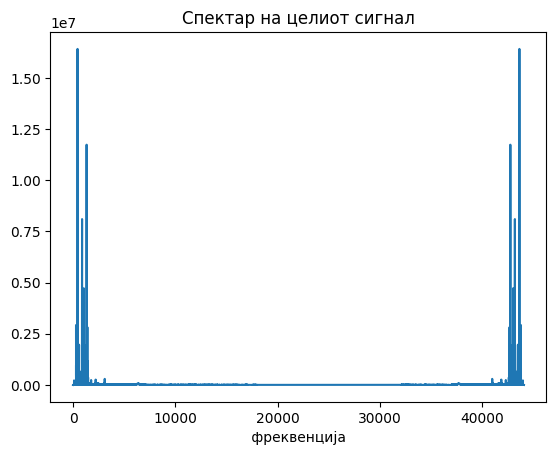

In [15]:
DFT = fft(data)
frek = np.linspace(0, samplerate, len(data))  # N фреквенции до најголемата фреквенција 
plt.plot(frek, abs(DFT))
plt.title('Спектар на целиот сигнал')
plt.xlabel(' фреквенција ')
plt.show()

# Преглед на нискиот дел од сигналот

44100


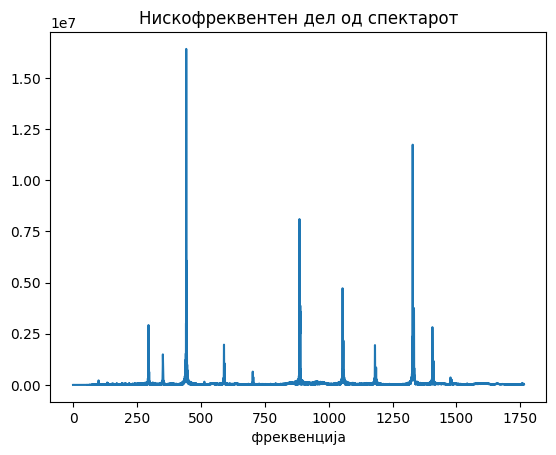

Top 3 Peaks:
Peak 1: 442.93 Hz
Peak 2: 1328.79 Hz
Peak 3: 885.86 Hz


In [16]:
N = len(data)
M = N // 25
Niski = DFT[0:M]
frek = np.linspace(0, samplerate * M / N, M)
plt.plot(frek, abs(Niski))
plt.title('Нискофреквентен дел од спектарот')
plt.xlabel(' фреквенција ')
plt.show()

amplitudes = abs(Niski)

peaks, properties = find_peaks(amplitudes, height=0.7)  # Set minimum height threshold

top3_indices = peaks[np.argsort(properties['peak_heights'])[-3:]][::-1]

top3_freqs = frek[top3_indices]

print("Top 3 Peaks:")
for i in range(3):
    print(f"Peak {i + 1}: {top3_freqs[i]:.2f} Hz")

https://www.liutaiomottola.com/formulae/freqtab.htm
Листа со тонови и нивната фреквенција. 
Редоследот на свирење на нотите со користење на ДФТ на делови од сигналот


Првиот тон е во примероците од ~ 50000 до 100000
Вториот тон е во примероците од ~ 120000 до 170000
Третиот тон е во примероците од ~ 210000 до 260000

Peak Frequency: 885.9428677608946 Hz


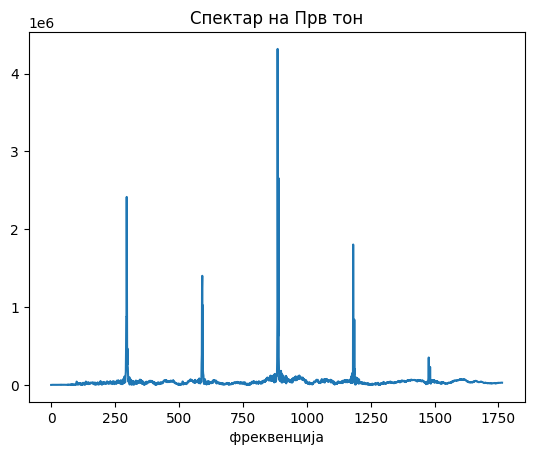

Peak Frequency: 1054.483791807041 Hz


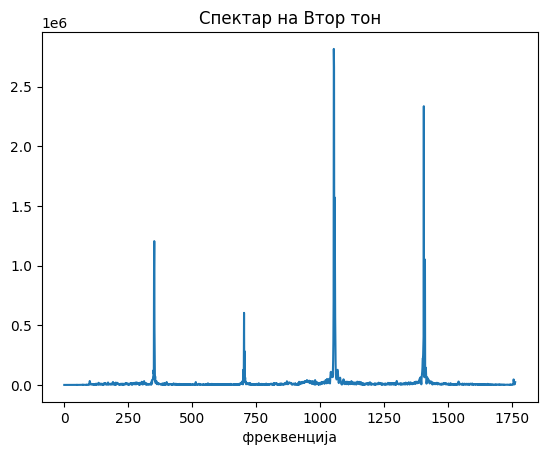

Peak Frequency: 442.9714338804473 Hz


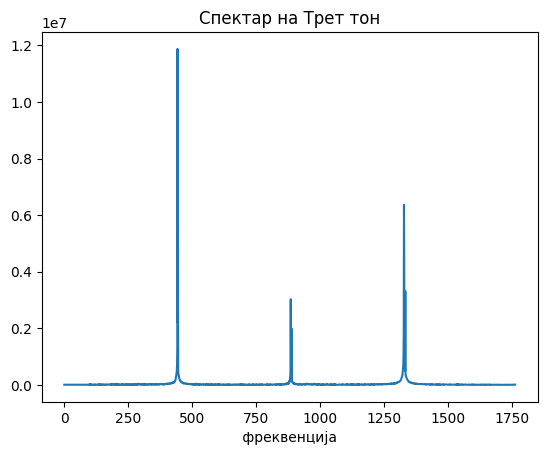

In [17]:
PrvDel = data[50000:100000]
VtorDel = data[120000:170000]
TretDel = data[210000:260000]


# N = len(data)
# M = N // 25
# Niski = DFT[0:M]
# frek = np.linspace(0, samplerate * M / N, M)
# plt.plot(frek, abs(Niski))

def plot_signal(segment, title):
    plt.figure(figsize=(8, 4))
    plt.plot(segment)
    plt.xlabel('n')
    plt.ylabel('Amplitude')
    plt.title(f'Изглед на сигналот ({title})')


def plot_dft(signal, title):
    dft = fft(signal)
    dft = dft[0:len(signal) // 25]
    freq = np.linspace(0, samplerate * M / N, len(dft))  # N фреквенции до најголемата фреквенција 

    print(f"Peak Frequency: {freq[np.argmax(abs(dft))]} Hz")

    plt.plot(freq, abs(dft))
    plt.title(f'Спектар на {title}')
    plt.xlabel(' фреквенција ')
    plt.show()


# plot_signal(PrvDel, "Прв тон")
# plot_signal(VtorDel, "Втор тон")
# plot_signal(TretDel, "Трет тон")

plot_dft(PrvDel, "Прв тон")
plot_dft(VtorDel, "Втор тон")
plot_dft(TretDel, "Трет тон")